# 2. Using iterative algo to solve NUS problem

We are going to solve a simple NUS problem, using a standard O.M.P. algorithm.

For this, we'll use the scikit-learn package.

Documentation
- [Example on scikit-learn site](http://scikit-learn.org/stable/auto_examples/linear_model/plot_omp.html#example-linear-model-plot-omp-py)
- [Implementation of the OMP algorithm for sparse recovery tasks in ODFM systems](http://publica.fraunhofer.de/dokumente/N-326126.html)


*Thanks to Lionel.Chiron@casc4de.eu for helping on this one*

In [1]:
# load environment
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import dft, hadamard, pinv
from numpy.fft import fft, ifft
from math import sqrt

from sklearn.linear_model import OrthogonalMatchingPursuit

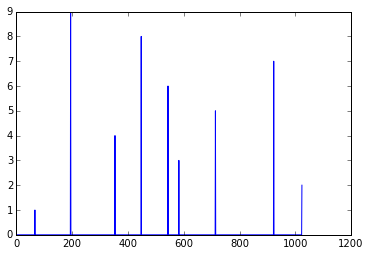

In [2]:
# parameters
n_components = 1024    # N: components of the spectrum,
n_features = 200       # M: length of observation
n_nonzero_coefs = 10   # K: nb of non-zero components in the direct domain. 

# create peaks
randindex =  np.random.permutation(n_components)[:n_nonzero_coefs]

# spectrum
x = np.zeros(n_components)
x[randindex] = np.arange(n_nonzero_coefs) #
plt.plot(x)

(200, 1024) (1024,) (200,)


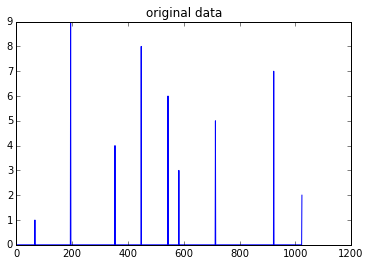

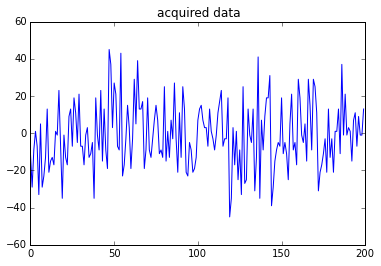

In [11]:
# Choose the transform

# Hadamard
D = hadamard(n_components)

# Fourier
#D = dft(n_components)

# Random
#D = np.random.randn(n_components,n_components)/np.sqrt(n_components)

# combining Hadamard and random
#D1 = hadamard(n_components)
#D2 = np.random.randn(n_components,n_components)/np.sqrt(n_components)
#D = np.dot(D1,D2)

# For some transform, there is no difference between truncation and random sampling
# create peaks

sampling =  np.random.permutation(n_components)[:n_features]
Dt = D[sampling,:]

# create acquired data
spec = np.dot(Dt,x)
# eventually add some noise
noise = 0.0
spec += noise*max(spec)*np.random.randn(n_features)

print Dt.shape, x.shape, spec.shape

plt.plot(x)
plt.title("original data")
plt.figure()
plt.plot(spec)
plt.title("acquired data")

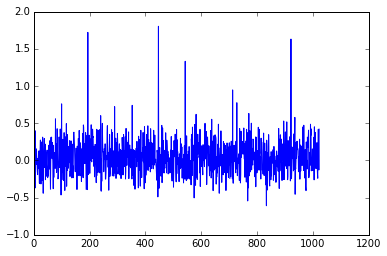

In [12]:
# Least Square Solution
Dm1 = pinv(Dt)
lsq = np.dot(Dm1, spec)
plt.plot(lsq)

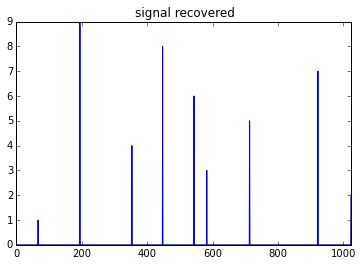

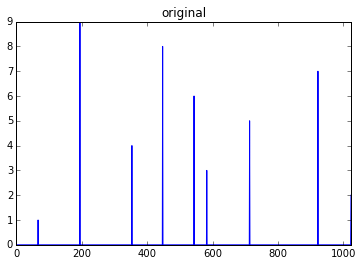

In [13]:
######## Reconstruction

omp = OrthogonalMatchingPursuit()
omp.fit(Dt, spec)
coef = omp.coef_
idx_r, = coef.nonzero()

plt.title("signal recovered")
plt.plot(coef)
plt.xlim(xmin = 0, xmax=n_components)

plt.figure()
plt.title("original")
plt.plot(x)
h=plt.xlim(xmin = 0, xmax=n_components)


so we completely recovered this 1000 points data-set from only 200 measurements

You may explore how this reacts
 - with the transform $D$
 - with the parameters 
```python
    n_components = 1024    # N: components of the spectrum
    n_features = 200       # M: length of observation
    n_nonzero_coefs = 10   # K: nb of non-zero components in the direct domain. 
```
 - with the noise level
 - with the sampling algo